In [44]:
%matplotlib inline

import json
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy.misc
from PIL import Image
from matplotlib.pyplot import imshow

In [51]:
def getGraphData(data):
    x =[]
    x_length = len(data["0"]["x"])
    for i in range(x_length):
        x.append(data["0"]["x"][i])
    mean = []
    variance = []
    ste =[]
    steUp =[]
    steDown =[]
    length = len(data["0"]["y"])
    for j in range(length):
        dataarray = []
        for i in data:
            #print(i)
            #print(j)
            value = np.clip(data[i]["y"][j], 0, None)
            dataarray.append(value)
        mu = np.mean(dataarray)
        mean.append(mu)
        variance.append(np.var(dataarray))
        sigma = np.std(dataarray)
        ste.append(sigma)
        steUp.append( mu + sigma )
        steDown.append( mu - sigma )
    
    return x,mean,variance,ste, steUp,steDown#,maxValue,minValue,sd,stdUp,stdDown

In [52]:
# 'Concrete_Dropout_Hidden_Hidden_Map_average.eps'
def buildGraphs(file, name):
    data = json.load(open(file))
    x,mean,variance ,ste, steUp,steDown= getGraphData(data)
    plt.rc('font',size=14)
    plt.plot(x, mean)
    plt.xlabel('Epochs')
    plt.xscale('log')
    plt.ylabel('Average Probability')
    plt.tight_layout()
    plt.fill_between(x, steUp, steDown, color='orange', alpha='0.5')
    plt.savefig(name)
    plt.show()


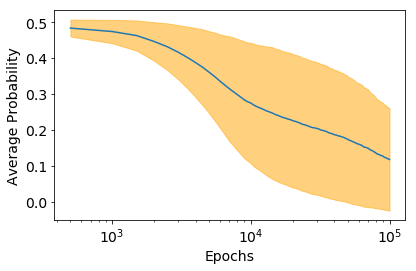

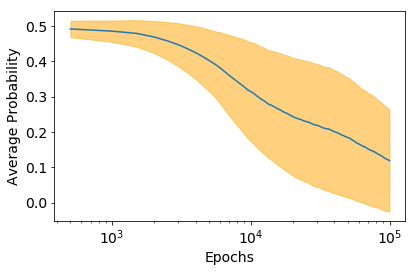

In [53]:
buildGraphs("mask_hidden.json", "Concrete_Dropout_Hidden_Hidden_Map_average.eps")
buildGraphs("mask_input.json", "Concrete_Dropout_Input_Hidden_Map_average.eps")

In [83]:
def buildEpoch(file, no, name):
    data = json.load(open(file))
    reshapedData = np.matrix(data["0"]["y"][no][0]).reshape((16, 16))
    print(reshapedData.shape)
    aux = imshow(reshapedData, vmin=0, vmax=0.75)
    plt.axis('off')
    if(no == 199):
        plt.colorbar(aux, ticks=[0,0.75, 1])
    value = (no + 1)*500
    saveFile = 'Epoch_' + str(value) +'_CMap_' + name +'.eps'
    print(saveFile)
    plt.savefig(saveFile)
    
def buildPics(file, name):
    arr = [0,74,149,199]
    for i in arr:
        buildEpoch(file, i, name)
        plt.figure()

(16, 16)
Epoch_500_CMap_hidden.eps
(16, 16)
Epoch_37500_CMap_hidden.eps
(16, 16)
Epoch_75000_CMap_hidden.eps
(16, 16)
Epoch_100000_CMap_hidden.eps


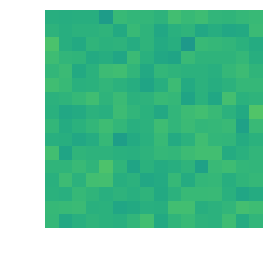

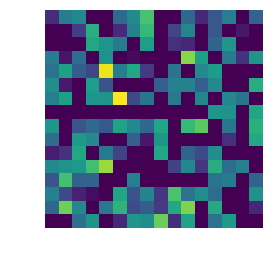

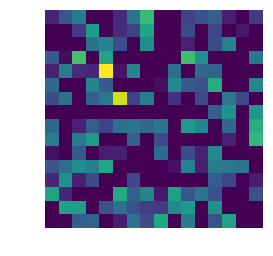

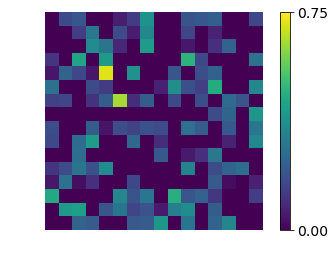

In [84]:
 buildPics("mask_hidden.json", "hidden")

(16, 16)
Epoch_500_CMap_input.eps
(16, 16)
Epoch_37500_CMap_input.eps
(16, 16)
Epoch_75000_CMap_input.eps
(16, 16)
Epoch_100000_CMap_input.eps


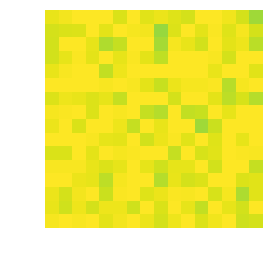

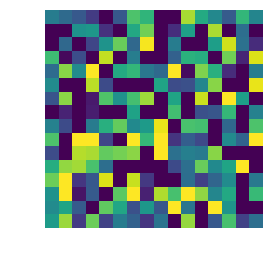

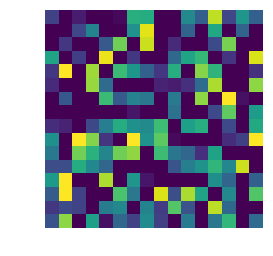

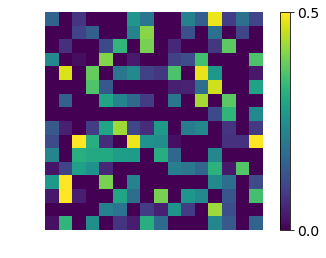

In [56]:
 buildPics("mask_input.json", "input")